# **Problem 1**

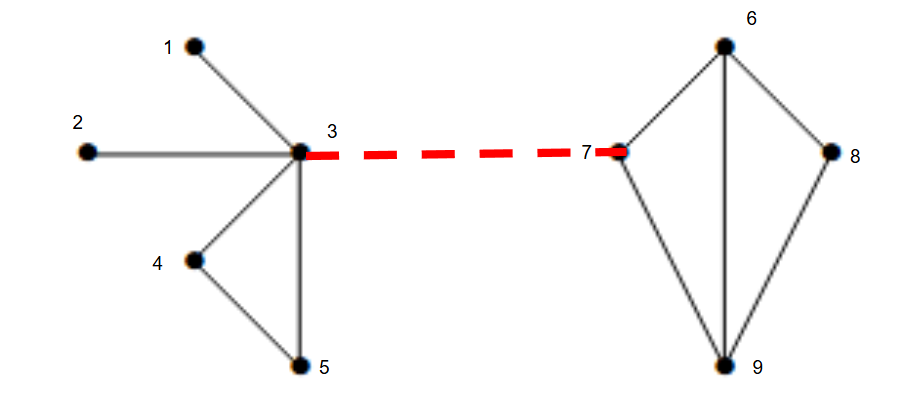![](https://drive.google.com/file/d/1iu4PHIyIxBJyTDJ7UbM2qSieGsDdsrPl/view?usp=sharing)

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

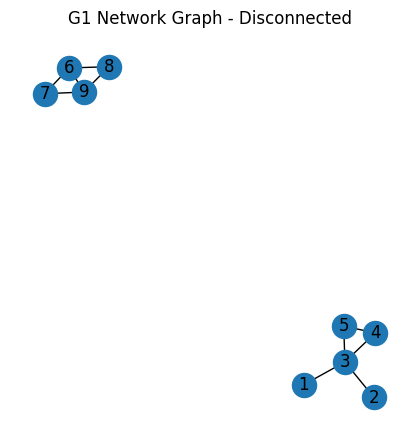

In [ ]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4,5,6,7,8, 9])
G1.add_edges_from([(1,3), (3,2), (3,4), (4,5),
                  (5,3), (6,7), (7,9), (9, 8),
                  (8,6), (9,6)])
A1 = nx.to_numpy_array(G1)
plt.figure(figsize=(4, 4))
nx.draw(G1, with_labels=True)
plt.title("G1 Network Graph - Disconnected")
plt.show()

In [ ]:
# compute the laplacian
L1 = nx.laplacian_matrix(G1).toarray()

# Compute eigenvalues for G1, G2
disconnected_eigenvals, disconnected_eigenvecs = np.linalg.eigh(L1)

# sort the eigenvals by magnitude
sorted_disconnected_eigenvalues = disconnected_eigenvals[np.argsort(np.abs(disconnected_eigenvals))]
print(f"Second smallest eigenvalue: {sorted_disconnected_eigenvalues[1]}")

Second smallest eigenvalue: 1.1102230246251565e-16


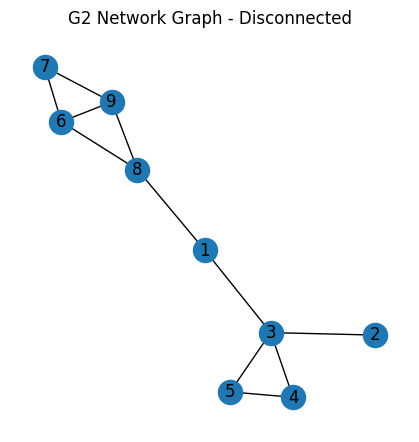

In [ ]:
G2 = nx.Graph()
G2.add_nodes_from([1,2,3,4,5,6,7,8, 9])
G2.add_edges_from([(1,3), (3,2), (3,4), (4,5),
                  (5,3), (6,7), (7,9), (9, 8),
                  (8,6), (9,6)])
G2.add_edge(1, 8)
A2 = nx.to_numpy_array(G2)
plt.figure(figsize=(4, 4))
nx.draw(G2, with_labels=True)
plt.title("G2 Network Graph - Disconnected")
plt.show()

In [ ]:
# compute the laplacian
L2 = nx.laplacian_matrix(G2).toarray()

# Compute eigenvalues for G1, G2
connected_eigenvals, connected_eigenvecs = np.linalg.eigh(L2)

# sort the eigenvals by magnitude
sorted_connected_eigenvalues = connected_eigenvals[np.argsort(np.abs(connected_eigenvals))]
print(f"Second smallest eigenvalue: {sorted_connected_eigenvalues[1]}")

Second smallest eigenvalue: 0.19675305762536197


# **Problem 6**

In [97]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import csv

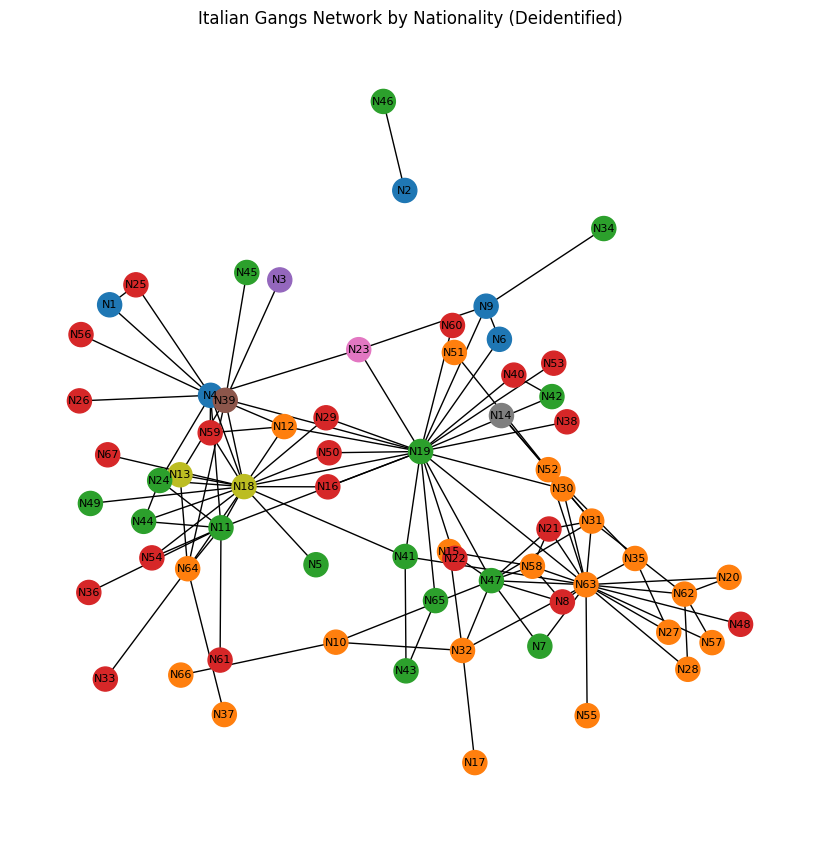

In [114]:
# Save metadata: this is all nationalities (deidentified) and their corresponding persons
with open('CSV/ITALIAN_GANGS_ATTR.csv', "r") as Metadata:
    next(Metadata, None)  # Skip header
    metadata = {}
    for row in csv.reader(Metadata):
        node_name, nationality = row
        metadata[node_name] = nationality

# Load the graph from csv file under CSV directory
with open('CSV/ITALIAN_GANGS.csv', "r") as Data:
    next(Data, None)
    labels = []
    adjacency_list = []

    for row in csv.reader(Data):
        labels.append(row[0])
        adjacency_list.append([int(val) for val in row[1:]])

# make my adjacency matrix thingy
adjacency_matrix = np.array(adjacency_list)
G = nx.from_numpy_array(adjacency_matrix)

# readd old labels: https://stackoverflow.com/questions/46606176/relabeling-nodes-of-a-graph-in-networkx 
mapping = {i: labels[i] for i in range(len(labels))}
G = nx.relabel_nodes(G, mapping)

# https://stackoverflow.com/questions/26985594/how-can-i-map-the-colors-of-a-node-according-to-the-value-of-a-attribute-using-n 
unique_nationalities = list(set(metadata.values()))
color_map = {nat: color for nat, color in zip(unique_nationalities, mcolors.TABLEAU_COLORS)}
node_colors = [color_map[metadata[node]] for node in G.nodes()]

# https://stackoverflow.com/questions/14283341/how-to-increase-node-spacing-for-networkx-spring-layout
pos = nx.spring_layout(G, k=0.3)
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, font_size=8, node_color=node_colors)
plt.title("Italian Gangs Network by Nationality (Deidentified)")
plt.show()

In [111]:
# Compute the laplacian and corresponding eigenvals
L = nx.laplacian_matrix(G).toarray()
eigenvals, eigenvecs = np.linalg.eigh(L)
sorted_eigenvals = eigenvals[np.argsort(np.abs(eigenvals))]
print(sorted_eigenvals)

spctral_gap = sorted_eigenvals[2] - sorted_eigenvals[1]
print(f"Spectral gap: {spctral_gap}")

[-6.06828879e-16  2.58119352e-15  1.49436031e-01  3.77129036e-01
  4.78650093e-01  5.34552231e-01  6.29067550e-01  6.49325828e-01
  7.08809831e-01  7.21687304e-01  7.79380189e-01  7.95563025e-01
  8.59933907e-01  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.03262417e+00  1.27970403e+00  1.35303744e+00
  1.45027964e+00  1.54045584e+00  1.62857614e+00  1.86149104e+00
  1.95549178e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
  2.00000000e+00  2.00000000e+00  2.00162075e+00  2.09468515e+00
  2.26879480e+00  2.37712492e+00  2.63199474e+00  2.67412212e+00
  2.72781786e+00  3.00000000e+00  3.00000000e+00  3.17966379e+00
  3.34140528e+00  3.41866208e+00  4.33217442e+00  4.49549283e+00
  4.59454057e+00  5.04100063e+00  5.07874303e+00  5.48883909e+00
  5.70684278e+00  5.82491487e+00  6.20684834e+00  6.75690944e+00
  7.33848454e+00  9.55358

In [115]:
# get rid of the smallest component
G.remove_node('N46')
G.remove_node('N2')

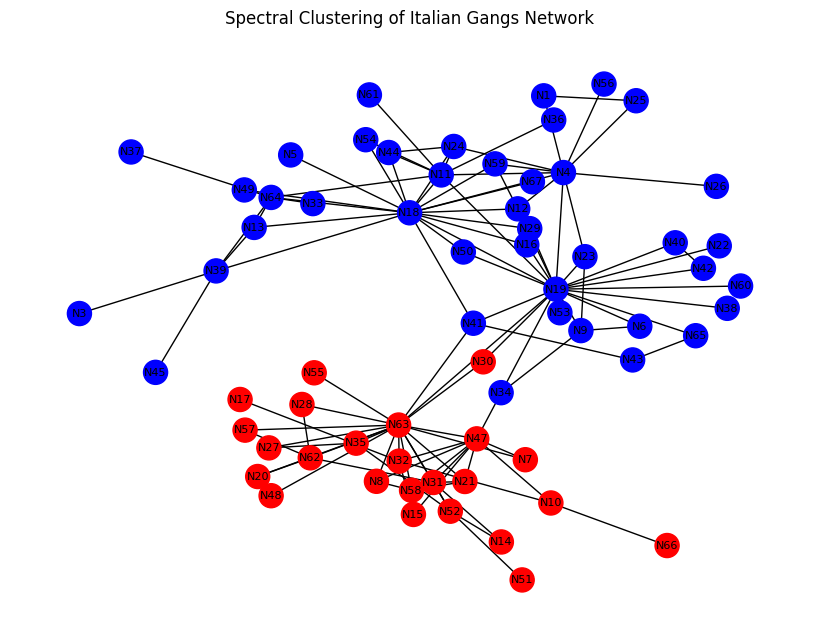

In [131]:
# recompute the laplacian and corresponding eigenvals
L = nx.laplacian_matrix(G).toarray()
eigenvals, eigenvecs = np.linalg.eigh(L)

# sort eigenvals and eigenvecs by magnitude of eigenvals
sorted_eigenvals = eigenvals[np.argsort(np.abs(eigenvals))]
sorted_eigenvecs = eigenvecs[:, np.argsort(np.abs(eigenvals))]

# eigenvec corresponds to Fiedler value
second_smallest_eigenvec = sorted_eigenvecs[:, 1]
color_map_clusters = [0 if v < 0 else 1 for v in second_smallest_eigenvec]

pos = nx.spring_layout(G, k=0.3)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, font_size=8, node_color=color_map_clusters, cmap=plt.cm.bwr)
plt.title("Spectral Clustering of Italian Gangs Network")
plt.show()